# Visualizando imágenes

Libreta para seguir el conjunto de imagenes que vayan saliendo para el área de estudio.

## Inicio

In [1]:
import os
os.chdir('C:\\Users\\usuario\\Documents\\00-notebooks-2022')
os.getcwd()

'C:\\Users\\usuario\\Documents\\00-notebooks-2022'

In [2]:
# Earth Engine
import ee
ee.Initialize()

import geemap
import geemap.colormaps as cmp # Paletas para visualización de imágenes (cm se confunde con matplotlib)

import pandas as pd
from ipywidgets import interact, fixed

import matplotlib.pyplot as plt


# Archivos .py con funciones
from vis_tools import *

In [ ]:
# Por cada cambio se necesita usar importlib.reload
import importlib # Para volver a importar el archivo funciones.py posterior a cada cambio
import sys
importlib.reload(sys.modules['vis_tools'])

## Assets y ROI

In [3]:
# Diccionario de visualización de imágenes Landsat 8 y 9 TOA
vis_rgb = {'min': 0.0, 'max': 0.3, 'bands': ['B4', 'B3', 'B2']} 

In [4]:
# Assets
asset_dept = ee.FeatureCollection('users/CesarVilca/departamentos')
asset_prov = ee.FeatureCollection('users/CesarVilca/provincias')
asset_dist = ee.FeatureCollection('users/CesarVilca/distritos')

# Filtrado
deptSelectedName = 'LAMBAYEQUE'
provSelectedName = 'FERREÑAFE' # 'FERREÑAFE' 'CHICLAYO'
distSelectedName = 'FERREÑAFE' # 'FERREÑAFE' 'CHONGOYAPE'

dept_fcol = asset_dept.filterMetadata('DEPARTAMEN', 'equals', deptSelectedName)
prov_fcol = asset_prov.filterMetadata('PROVINCIA', 'equals', provSelectedName)
dist_fcol = asset_dist.filterMetadata('DISTRITO', 'equals', distSelectedName)

# ROI Caja
roi = dist_fcol.geometry().bounds()

empty = ee.Image().paint(dist_fcol, 2,2)
empty2 = ee.Image().paint(roi, 2, 2)

In [5]:
# Visualización
Map = geemap.Map(layer_ctrl = True) 
Map.centerObject(dist_fcol, 9)

Map.addLayer(dept_fcol, {'color':'red'}, f'Departamento {deptSelectedName}')
Map.addLayer(prov_fcol, {'color':'green'}, f'Provincia {provSelectedName} ')
Map.addLayer(dist_fcol, {'color':'blue'}, f'Distrito {distSelectedName}')

# Bordes
Map.addLayer(empty , {}, 'Distrito Seleccionado')
Map.addLayer(empty2, {}, 'Limites')

Map

Map(center=[-6.6205221157277006, -79.79111975903714], controls=(WidgetControl(options=['position', 'transparen…

In [39]:
# Archivos Vectoriales para filtrado y visualización

# ruta_ferrenafe = r'files/Ferreñafe_areas.shp' # en Local (Antiguo)
ruta_ferrenafe = r'files/Ferreñafe_areas_2.shp' # en Local (Modificado con imagen RGB de drone)
# ruta_ferrenafe = r'/content/Ferreñafe_areas.shp' # en Colab

predios_agricolas = geemap.shp_to_ee(ruta_ferrenafe)
predios_vis = ee.Image().byte().paint(predios_agricolas, 1, 1) # Para visualización con geemap

predios_bound = predios_agricolas.geometry().bounds()
predios_bound_vis = ee.Image().byte().paint(predios_bound, 1, 1) # Para visualización con geemap

type(predios_agricolas)

ee.featurecollection.FeatureCollection

## Filtrado

In [7]:
# Filtrado
path = 10
row = 65 # 64

fecha = '2021-12'
meses = 7

### Landsat 8 y 9

In [8]:
tier = 'T1_TOA'
snippet_name = f"LANDSAT/LC08/C02/{tier}"
icol_l8_id = f'LANDSAT/LC09/C02/{tier}'
icol_l9_id = f'LANDSAT/LC08/C02/{tier}'

# Generando L9 raw
icol_l9 = (
    ee.ImageCollection(icol_l9_id)
    .filterDate(fecha, ee.Date(fecha).advance(meses, 'month'))
    .filterMetadata('WRS_PATH', 'equals', path)
    .filterMetadata('WRS_ROW', 'equals', row)
)

reporteL9_raw = generar_reporte(icol_l9).sort_values('Fecha Corta')

# Generando L8 raw

icol_l8 = (
    ee.ImageCollection(icol_l8_id)
    .filterDate(fecha, ee.Date(fecha).advance(meses, 'month'))
    .filterMetadata('WRS_PATH', 'equals', path)
    .filterMetadata('WRS_ROW', 'equals', row)
)

reporteL8_raw = generar_reporte(icol_l8).sort_values('Fecha Corta')

# Concatenar DataFrames
df_l8_l9 = pd.concat([reporteL9_raw, reporteL8_raw])

# Ordenar fechas
df_l8_l9 = df_l8_l9.sort_values('Fecha Corta') # De mayor a menor usar: ,ascending=False

df_l8_l9 = df_l8_l9.reset_index(drop=True)
df_l8_l9

,ID GEE,Fecha Precisa,Fecha Corta,Año,Mes,Día,Día Juliano,CLOUD_COVER,SUN_ELEVATION
0,LANDSAT/LC08/C02/T1_TOA/LC08_010065_20211204,2021-12-04 10:28:39.679,2021-12-04,2021,12,4,338,41.76,61.231303
1,LANDSAT/LC09/C02/T1_TOA/LC09_010065_20211212,2021-12-12 10:28:36.901,2021-12-12,2021,12,12,346,46.70,60.112699
2,LANDSAT/LC08/C02/T1_TOA/LC08_010065_20211220,2021-12-20 10:28:37.250,2021-12-20,2021,12,20,354,67.62,59.196546
3,LANDSAT/LC09/C02/T1_TOA/LC09_010065_20211228,2021-12-28 10:28:35.288,2021-12-28,2021,12,28,362,83.58,58.451368
4,LANDSAT/LC08/C02/T1_TOA/LC08_010065_20220105,2022-01-05 10:28:32.585,2022-01-05,2022,1,5,5,42.07,57.964139
5,LANDSAT/LC09/C02/T1_TOA/LC09_010065_20220113,2022-01-13 10:28:31.598,2022-01-13,2022,1,13,13,32.94,57.699672
6,LANDSAT/LC08/C02/T1_TOA/LC08_010065_20220121,2022-01-21 10:28:28.991,2022-01-21,2022,1,21,21,37.22,57.678164
7,LANDSAT/LC09/C02/T1_TOA/LC09_010065_20220129,2022-01-29 10:28:34.396,2022-01-29,2022,1,29,29,21.12,57.843961
8,LANDSAT/LC08/C02/T1_TOA/LC08_010065_20220206,2022-02-06 10:28:25.404,2022-02-06,2022,2,6,37,52.05,58.152624
9,LANDSAT/LC09/C02/T1_TOA/LC09_010065_20220214,2022-02-14 10:28:30.097,2022-02-14,2022,2,14,45,88.04,58.557032


In [ ]:
# Guardar dataframe
df_l8_l9.to_csv('reporte-L8_L9.csv', index=False, encoding='utf-8-sig')

In [9]:
# Imagenes totales (Landsat 8 y 9)
icol_l9.merge(icol_l8).size().getInfo()

27

In [ ]:
# Exportar csv
# df_l8_l9.to_csv('df_l8_l9.csv', index=False, encoding='utf-8-sig')

In [10]:
df_reporte = df_l8_l9
  
# Visualizar imágenes por mes
mes = df_reporte['Mes'].unique().tolist()
interact(ver_imgs_mensual, 
         mes=mes, 
         snippet_name =fixed(snippet_name), 
         df=fixed(df_reporte), 
         roi=fixed(predios_agricolas));

interactive(children=(Dropdown(description='mes', options=(12, 1, 2, 3, 4, 5, 6), value=12), Output()), _dom_c…

### Sentinel-2

In [11]:
# Filtrado Sentinel-2
snippet_name_s2 = 'COPERNICUS/S2'
# snippet_name_s2 = 'COPERNICUS/S2_SR'

icol_s2_sr = (
    ee.ImageCollection(snippet_name_s2)
    .filterDate(fecha, ee.Date(fecha).advance(meses, 'month'))
    .filterBounds(predios_agricolas)
)

reporteS2 = generar_reporte(icol_s2_sr)
reporteS2

,ID GEE,Fecha Precisa,Fecha Corta,Año,Mes,Día,Día Juliano,MEAN SOLAR ZENITH ANGLE,CLOUDY PIXEL PERCENTAGE
0,COPERNICUS/S2/20211202T153621_20211202T154056_...,2021-12-02 10:45:07.038,2021-12-02,2021,12,2,336,25.107220,74.247100
1,COPERNICUS/S2/20211207T153619_20211207T153726_...,2021-12-07 10:45:02.453,2021-12-07,2021,12,7,341,25.872739,27.958400
2,COPERNICUS/S2/20211212T153621_20211212T154103_...,2021-12-12 10:45:06.775,2021-12-12,2021,12,12,346,26.540952,14.059200
3,COPERNICUS/S2/20211217T153609_20211217T153742_...,2021-12-17 10:45:01.362,2021-12-17,2021,12,17,351,27.156068,27.977200
4,COPERNICUS/S2/20211222T153621_20211222T154116_...,2021-12-22 10:45:08.640,2021-12-22,2021,12,22,356,27.636708,3.735200
5,COPERNICUS/S2/20211227T153619_20211227T153744_...,2021-12-27 10:45:03.076,2021-12-27,2021,12,27,361,28.058020,89.255500
6,COPERNICUS/S2/20220101T153621_20220101T154106_...,2022-01-01 10:45:09.178,2022-01-01,2022,1,1,1,28.337002,14.693500
7,COPERNICUS/S2/20220106T153619_20220106T153727_...,2022-01-06 10:45:03.572,2022-01-06,2022,1,6,6,28.547772,5.802700
8,COPERNICUS/S2/20220111T153621_20220111T154058_...,2022-01-11 10:45:08.654,2022-01-11,2022,1,11,11,28.615786,0.762000
9,COPERNICUS/S2/20220116T153619_20220116T153730_...,2022-01-16 10:45:03.128,2022-01-16,2022,1,16,16,28.618463,93.014300


In [ ]:
# Exportar .csv
reporteS2.to_csv('reporte-S2.csv', index=False, encoding='utf-8-sig')

In [12]:
df_reporte = reporteS2

# Ver imágenes por mes
mes = df_reporte['Mes'].unique().tolist()

interact(ver_imgs_mensual, 
         mes=mes, 
         snippet_name =fixed(snippet_name_s2), 
         df=fixed(df_reporte), 
         roi=fixed(predios_agricolas));

interactive(children=(Dropdown(description='mes', options=(12, 1, 2, 3, 4, 5, 6), value=12), Output()), _dom_c…

### Histórico de imágenes Landsat y Sentinel-2

Requiere:
- Haber realizado el filtrado para ambos datasets Landsat y Sentinel

**Gráficas interactivas con plotly**

Referencias:
- [Python Figure Reference: layout](https://plotly.com/python/reference/layout/)

In [ ]:
import plotly.graph_objects as go

In [ ]:
# Visualización con Plotly

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=reporteL8_raw['Fecha Precisa'], 
               y=reporteL8_raw['CLOUD_COVER'],
               name=icol_l8_id, 
               marker_color= 'rgba(0, 0, 0, 0.7)',
               mode='lines+markers',
               xhoverformat="%d-%m-%Y",
               hovertemplate='%{y}%',
               line = dict(width=2)
               )
    )

fig.add_trace(
    go.Scatter(x=reporteS2['Fecha Precisa'], 
               y=reporteS2['CLOUDY PIXEL PERCENTAGE'],
               name='Sentinel-2', 
               marker_color= 'rgba(0, 0, 0, 0.7)',
               mode='lines+markers',
               xhoverformat="%d-%m-%Y",
               hovertemplate='%{y:.2f}%',
               line = dict(width=2, dash='dot')
               )
    )

fig.add_trace(
    go.Scatter(x=reporteL9_raw['Fecha Precisa'], 
               y=reporteL9_raw['CLOUD_COVER'], 
               name=icol_l9_id, 
               marker_color= 'blue',
               mode='lines+markers', marker_size=7,
               xhoverformat="%d-%m-%Y",
               hovertemplate='%{y}%',
               line = dict(width=2)
              #  line = dict(width=2, dash='dot')
               )
    )

# fig.update_traces(mode = 'markers', marker_size=7)

# Título y hover
title_plotly = f'Imágenes Landsat 8, 9 y Sentinel-2'

fig.update_layout(
    plot_bgcolor = "white",
#     width = 800, 
    height = 400,
    hovermode="x unified",
    title = title_plotly,
    yaxis_range = [0,100],
#     xaxis_range = [fecha, pd.to_datetime(fecha) + relativedelta(months=meses)],
#  https://stackoverflow.com/questions/4130922/how-to-increment-datetime-by-custom-months-in-python-without-using-library
    margin=dict(t=75, b=25, l=0, r=0),
    legend=dict(x=0.27, y=-0.10),      # Posición de leyenda
    legend_orientation='h',
    font_family='sans-serif'
)

# Nombres en ejes
fig.update_yaxes(
    title_text='Nubosidad (%)',
    showline=False, linecolor='black', mirror=True,
    gridcolor='#7f7f7f'
)

# Obtener ticks mensuales
fig.update_xaxes(
    showline=True, 
    linecolor='black', mirror=True,
    gridcolor='#7f7f7f',
    dtick='M1', tickformat='%m-%Y'
    )

fig.show()

Resultado:
![](newplot.png)

**Exportar gráfica como archivo `.html`**

- [Plotly: Interactive HTML Export in Python](https://plotly.com/python/interactive-html-export/)

In [ ]:
# Exportar grafica como archivo html
fig.write_html('Historico L8, L9 y S2.html')

### Exportar histórico de imágenes con `cartoee` 

#### Función `get_grafica_cartoee`

In [36]:
def get_grafica_cartoee(image, vis_params, title_map=None, text=None, save_fig=None):

#     zoom_region = [-79.771781, -6.607186, -79.787761, -6.593991]

    extent = 0.0005
        
    zoom_region = [
        -79.77332525015065+extent, -6.605665317455976-extent,
        -79.78719338866794-extent, -6.594549 + extent
    ]

    fig = plt.figure(figsize=(5,5)) # layout='constrained'
#     fig = plt.figure(figsize=(8,6))

    # ee.Image a plotear
    ax = cartoee.get_map(image, region=zoom_region, vis_params=vis_params)

    # Añadir barra de color
    # https://matplotlib.org/stable/api/colorbar_api.html#module-matplotlib.colorbar   
#     cb = cartoee.add_colorbar(
#         ax, 
#         vis_params=vis_params, 
#         loc='right', 
#         label=label, 
#         posOpts=[0.86, 0.25, 0.02, 0.5]
#     )# drawedges=True, extend='both')

    # Añadir grillas
    cartoee.add_gridlines(
        ax, 
        interval=0.005, 
        ytick_rotation=90, 
        linestyle=":", 
        linewidth=0
    ) # xtick_rotation=45

    # Añadir texto
#     ax.text(-79.7828, -6.5962, title_map, fontsize=14, c='black', backgroundcolor='white') # ,

    # add scale bar
    scale_bar_dict = {
          "length": 100, 
          "xy": (0.9, 0.05), 
          "linewidth": 2,
          "fontsize": 14,
          "color": "black",
          "unit": "m",
          "ha": "center",
          "va": "bottom",    
    }
    
    cartoee.add_scale_bar_lite(ax, **scale_bar_dict)
    
    ax.tick_params(axis = 'both', labelsize = 12)
    
    if title_map != None:
        ax.set_title(title_map, fontsize=14)
    
    if text != None:
        ax.text(-79.7872, -6.6056, text, fontsize=14) #, c='black', backgroundcolor='white')
        # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html
         
    plt.tight_layout() # Comentar cuando se usen barras de color

    # Guardar graficas
    if save_fig != None:
        # plt.savefig(f'/Users/usuario/Downloads/{title_map}_{img_date}.jpg')
        # plt.savefig(f'/content/{title_map}_{img_date}.jpg')
        ruta = r'C:/Users/usuario/Documents/00-notebooks-2022/images/cartoee/'
        ruta_img = ruta + save_fig + '.jpg'
        plt.savefig(ruta_img)#, dpi=300)

    # plt.show()

In [14]:
# Area a visualizar 
roi_blend = ee.Image().paint(predios_agricolas, 0,5)

#### Imágenes Landsat 8 y 9

In [ ]:
df_l8_l9.columns

In [ ]:
reporteS2[reporteS2['Mes']==6]['ID GEE'].tolist()

In [ ]:
os.listdir('images/cartoee')

In [ ]:
os.mkdir(r'images/cartoee/RGB/Prueba_PLOTEO')

In [15]:
# Editando estilos para plots 
plt.rcParams['font.family'] = 'serif' #  'Arial', default es'sans-serif'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Manejo de warning: https://stackoverflow.com/questions/27476642/matplotlib-get-rid-of-max-open-warning-output
plt.rcParams.update({'figure.max_open_warning': 0})

Procesando Rn de imagen 04-12-2021...
Procesando Rn de imagen 12-12-2021...
Procesando Rn de imagen 20-12-2021...
Procesando Rn de imagen 28-12-2021...
Procesando Rn de imagen 05-01-2022...
Procesando Rn de imagen 13-01-2022...
Procesando Rn de imagen 21-01-2022...
Procesando Rn de imagen 29-01-2022...
Procesando Rn de imagen 06-02-2022...
Procesando Rn de imagen 14-02-2022...
Procesando Rn de imagen 22-02-2022...
Procesando Rn de imagen 02-03-2022...
Procesando Rn de imagen 10-03-2022...
Procesando Rn de imagen 18-03-2022...
Procesando Rn de imagen 26-03-2022...
Procesando Rn de imagen 03-04-2022...
Procesando Rn de imagen 11-04-2022...
Procesando Rn de imagen 19-04-2022...
Procesando Rn de imagen 27-04-2022...
Procesando Rn de imagen 05-05-2022...
Procesando Rn de imagen 13-05-2022...
Procesando Rn de imagen 21-05-2022...
Procesando Rn de imagen 29-05-2022...
Procesando Rn de imagen 06-06-2022...
Procesando Rn de imagen 14-06-2022...
Procesando Rn de imagen 22-06-2022...
Procesando R

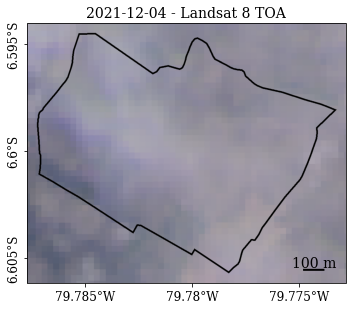

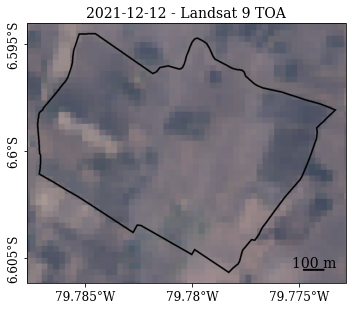

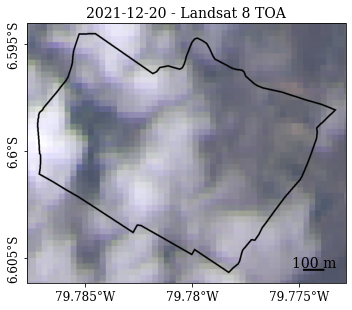

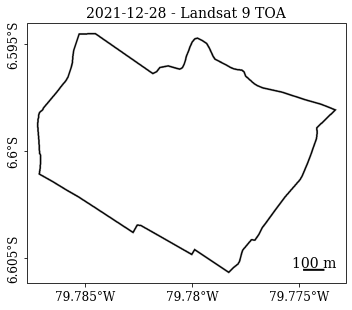

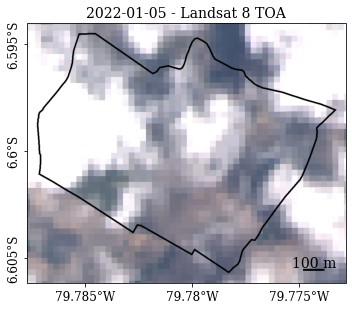

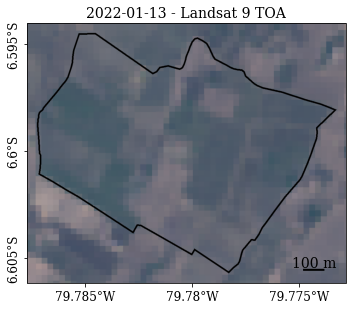

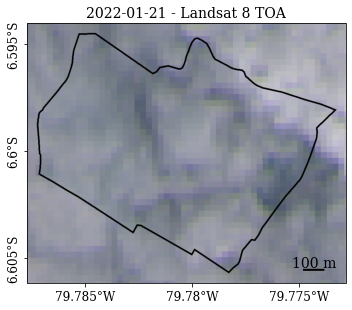

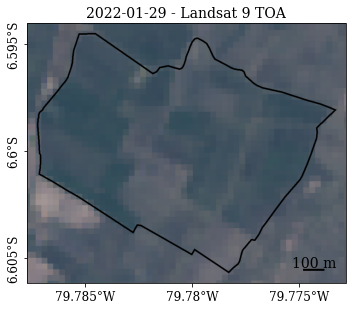

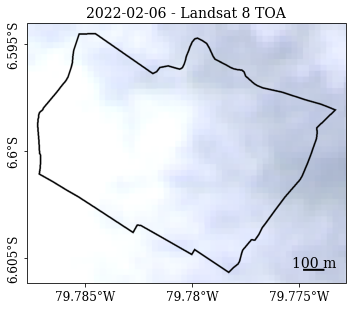

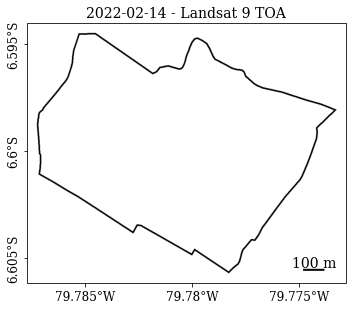

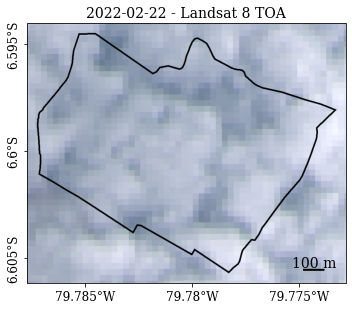

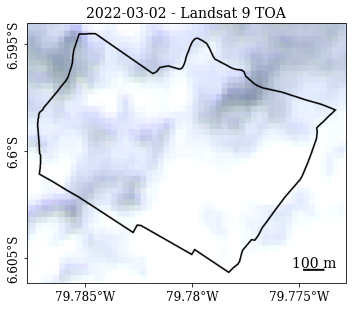

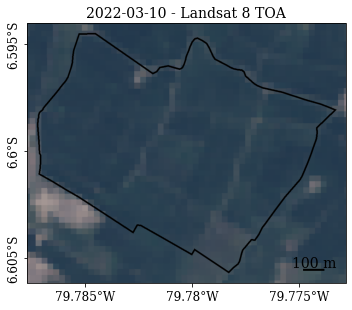

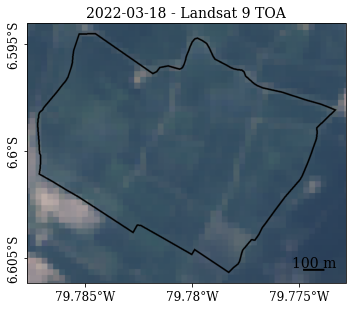

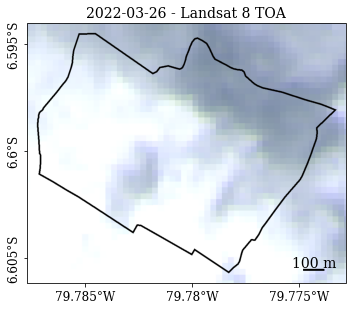

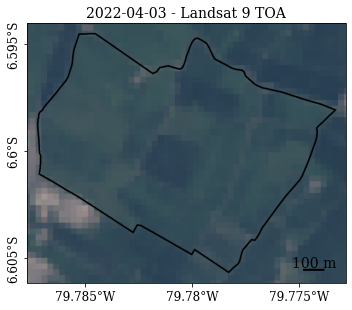

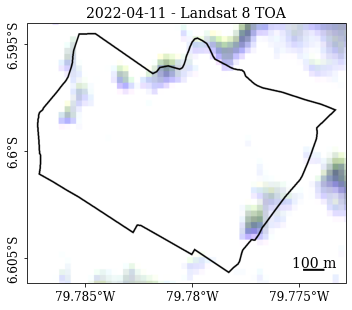

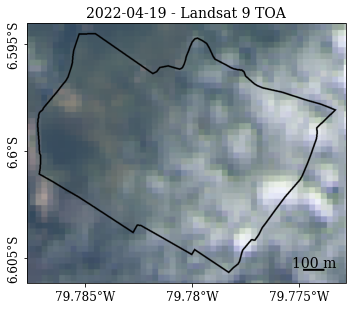

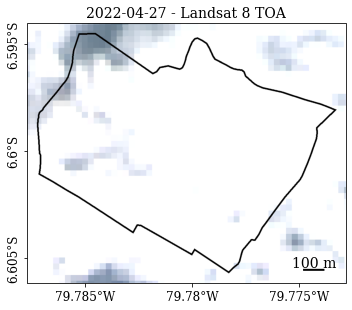

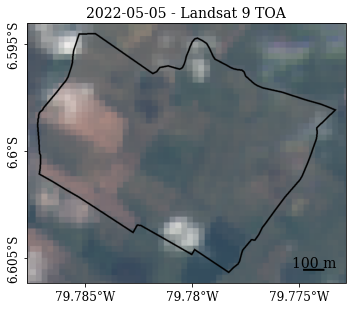

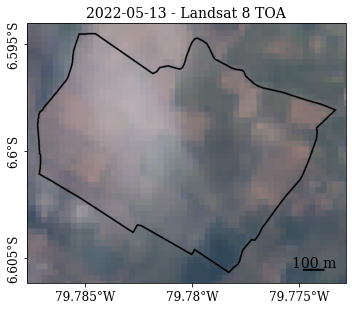

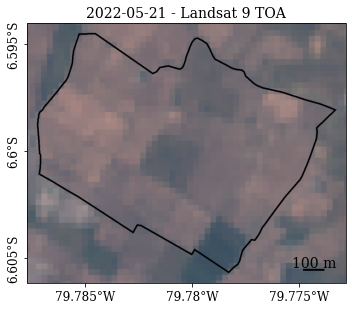

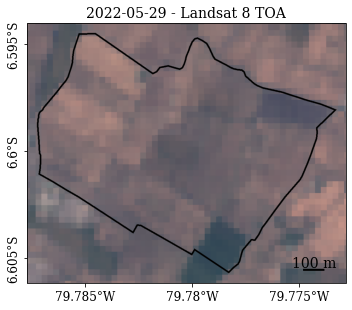

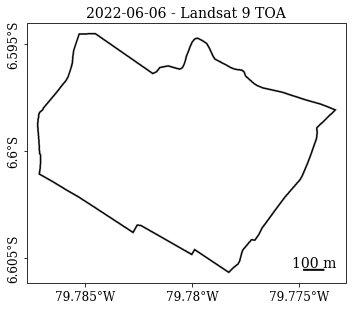

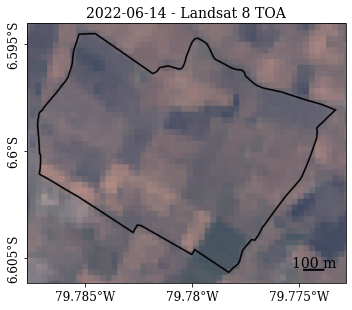

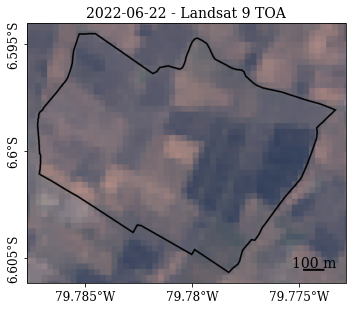

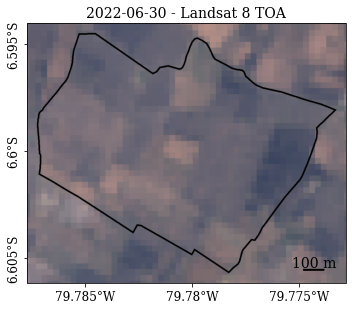

In [38]:
# Prueba
ids_lista = df_l8_l9['ID GEE'].tolist()
# ids_lista = df_l8_l9[df_l8_l9['Mes']==6]['ID GEE'].tolist() # Mes X
ids_lista

path = 'RGB/Prueba_PLOTEO/RGB_v3_8x6' # 5x5

for id_img in ids_lista:
    
    img_id = id_img #df_l8_l9['ID GEE'][0]
    landsat_id = img_id[11:12]
    
    img_ee = ee.Image(img_id)
    img_ee_vis = img_ee.blend(roi_blend) # .clip(predios_agricolas)
    
    img_date = img_ee.date()
    img_date_format1 = img_date.format('dd-MM-YYYY').getInfo()
    img_date_format2 = img_date.format('YYYY-MM-dd').getInfo()
    
    print(f'Procesando Rn de imagen {img_date_format1}...')

#     img_ee_id = img_ee.get('system:id').getInfo()

    get_grafica_cartoee(img_ee_vis, 
                        vis_rgb, 
                        title_map=f'{img_date_format2} - Landsat {landsat_id} TOA',
                        save_fig= None) #f'{path}_{img_date_format2}_L{landsat_id}')

In [34]:
# Prueba: Recortar las imágenes de una carpeta en específico
# Nota: Usar solo para recortar imágenes que lo necesiten y no olvidar borrar el archivo phototumb.db
path = r'C:\Users\usuario\Documents\00-notebooks-2022\images\cartoee\RGB\Prueba_PLOTEO\recortados'
list_imgs = os.listdir(path)
# list_imgs

import matplotlib.image as mpimg

plt.figure(1)
for i in range(len(list_imgs)):
    img_path = path+"\\"+list_imgs[i]
    img = mpimg.imread(img_path)[25:335,:] # Con grilla
    # img = mpimg.imread(img_path)[0:330,:] # Sin grilla
    plt.imsave(img_path, img) # https://www.delftstack.com/howto/numpy/save-numpy-array-as-image/

<Figure size 432x288 with 0 Axes>

#### Imágenes Sentinel-2

In [ ]:
vis_params = {'min': 0, 'max': 0.3, 'bands': ['B4','B3','B2'], 'gamma':0.8}

# Prueba
# img_s2_id = reporteS2['ID GEE'][2]
img_s2 = ee.Image('COPERNICUS/S2/20211207T153619_20211207T153726_T17MPN')
img_s2_vis = img_s2.multiply(0.0001).blend(roi_blend) # .clip(predios_agricolas)

img_date = img_s2.date()
img_date_format1 = img_date.format('dd-MM-YYYY').getInfo()
img_date_format2 = img_date.format('YYYY-MM-dd').getInfo()

# get_grafica_cartoee(img_s2_vis, vis_params, f'Sentinel-2 TOA - {img_date}', save_fig='img_prueba')#f'S2_{img_date}'
get_grafica_cartoee(img_s2_vis, 
                    vis_params, 
                    f'Sentinel-2 TOA - {img_date_format1}',
                    # f'Sentinel-2 TOA\n   {img_date}', 
                    save_fig=f'RGB/S2/RGB 8x6/S2_8x6_v2_{img_date_format2}_gamma_fixed')

In [ ]:
# os.mkdir(r'images/cartoee/RGB/S2')

In [ ]:
# Obtener gráficas para cada imagen
vis_params = {'min': 0, 'max': 0.3, 'bands': ['B4','B3','B2']}#, 'gamma':0.8}

# lista_ids = reporteS2['ID GEE'].tolist()
lista_ids = reporteS2[reporteS2['Mes']==1]['ID GEE'].tolist()

for ids in lista_ids:
    
    img_s2_id = ids
    img_s2 = ee.Image(img_s2_id)
    img_s2_vis = img_s2.multiply(0.0001).blend(roi_blend) # .clip(predios_agricolas)
    
    img_date = img_s2.date()
    img_date_format1 = img_date.format('dd-MM-YYYY').getInfo()
    img_date_format2 = img_date.format('YYYY-MM-dd').getInfo()
    
    print(f'Procesando imagen {img_date_format1}')
    
    get_grafica_cartoee(img_s2_vis, 
                        vis_params, 
                        f'Sentinel-2 TOA - {img_date_format1}',
                        # f'Sentinel-2 TOA\n   {img_date}', 
#                         save_fig=f'RGB/S2/S2_5x5_v2_{img_date_format2}'
                        save_fig=None
#                         f'RGB/S2/RGB 8x6/S2_8x6_v2_{img_date_format2}_gamma_fixed'
                       )

### Pruebas

#### Prueba Ricardo

In [ ]:
# Limite
geometria_lim = ee.FeatureCollection("users/20141206/cuenca-lim-lamb");
geometria = ee.Geometry.Polygon(
        [[[-79.91132905789127, -6.5489340783904915],
          [-79.91132905789127, -6.903531592298448],
          [-79.35377290554752, -6.903531592298448],
          [-79.35377290554752, -6.5489340783904915]]])

# Filtrado Sentinel-2

icol_s2_sr = (
    ee.ImageCollection('COPERNICUS/S2')
    .filterDate('2022-01-01', '2022-05-17')
    .filterMetadata('CLOUD_COVERAGE_ASSESSMENT','less_than', 100)
    .filterBounds(geometria)
)

reporteS2 = generar_reporte(icol_s2_sr)
# reporteS2 # Reporte en DataFrame

df_reporte = reporteS2

# Ver imágenes por mes
mes = df_reporte['Mes'].unique().tolist()
interact(ver_imgs_mensual, 
         mes=mes, 
         snippet_name =fixed('COPERNICUS/S2'), 
         df=fixed(df_reporte), 
         roi=fixed(geometria_lim));

# Prueba: Visualización NDVI

ndvi_paleta = {'min':0, 'max':1, 'palette':cmp.palettes.ndvi}
visParams = {'bands': ['B4', 'B3', 'B2'], 'min':0, 'max': 0.3, 'gamma': 1};

cuenca = ee.FeatureCollection("users/20141206/cuenca-lim-lamb")
img_id = 'COPERNICUS/S2/20220106T153619_20220106T153727_T17MPN'
img_s2 = ee.Image(img_id)

image_ndvi = img_s2.normalizedDifference(['B8','B4']).clip(cuenca)

Map = geemap.Map()
Map.centerObject(img_s2, 10)
Map.addLayer(img_s2.multiply(0.0001).clip(cuenca), vis_rgb, 'Imagen S2')
Map.addLayer(image_ndvi, ndvi_paleta, 'image_ndvi')
Map.addLayer(cuenca, {}, 'table')
Map